## This code is the study about feature importance of ESALQ experiment

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf
from datetime import datetime, timedelta
from pycaret.regression import *

In [2]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
df = pd.read_excel('biometria.xlsx', sheet_name='Página1')
print(df.tail(10))

     Index    peso  comprimento_Total  comprimento_Padrao  comprimento_Cabeca  \
664  665.0  492.04               29.0                24.8                 8.0   
665  666.0  454.02               27.0                23.0                 7.6   
666  667.0  480.56               27.1                22.8                 7.5   
667  668.0  412.75               25.7                22.0                 7.5   
668  669.0  471.80               27.2                23.4                 7.4   
669  670.0  382.79               25.4                21.5                 7.5   
670  671.0  401.90               26.5                22.3                 7.2   
671  672.0  441.98               27.8                23.4                 7.5   
672  673.0  468.54               28.0                23.5                 7.8   
673  674.0  418.14               26.3                22.2                 7.4   

     altura  espessura       data  
664     9.1        3.2 2024-06-12  
665     9.0        3.2 2024-06-12  


In [3]:
#df.nunique(axis='columns')
df['data'].unique()

array(['2024-02-28T00:00:00.000000000', '2024-03-20T00:00:00.000000000',
       '2024-04-10T00:00:00.000000000', '2024-05-02T00:00:00.000000000',
       '2024-05-23T00:00:00.000000000', '2024-06-12T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [4]:
df1=df[df['data']=='2024-02-28T00:00:00.000000000']
df2=df[df['data']=='2024-03-20T00:00:00.000000000']
df3=df[df['data']=='2024-04-10T00:00:00.000000000']
df4=df[df['data']=='2024-05-02T00:00:00.000000000']
df5=df[df['data']=='2024-05-23T00:00:00.000000000']
df6=df[df['data']=='2024-06-12T00:00:00.000000000']

In [5]:
def drop_columns(df):
    """
    Drops the specified columns from the DataFrame and returns the resulting DataFrame.
    Also prints the first few rows of the resulting DataFrame.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    
    Returns:
    pd.DataFrame: The DataFrame after dropping the specified columns.
    """
    columns_to_drop = ['data', 'Index', 'espessura']
    df = df.drop(columns=columns_to_drop)
    return df

In [6]:
# List of DataFrames
dataframes = [df, df1, df2, df3, df4, df5, df6]

# Apply drop_columns function to each DataFrame in the list
dropped_dataframes = [drop_columns(df) for df in dataframes]

# Print the first few rows of each resulting DataFrame
for i, df in enumerate(dropped_dataframes):
    print(f"DataFrame {i+1} after dropping columns:")
    print(df.head())

DataFrame 1 after dropping columns:
    peso  comprimento_Total  comprimento_Padrao  comprimento_Cabeca  altura
0  51.45               14.3                12.2                 4.0     4.1
1  37.15               12.4                10.9                 3.8     3.2
2  47.26               13.7                11.2                 3.4     4.0
3  36.67               12.9                11.1                 3.7     3.7
4  45.48               13.2                11.3                 3.8     4.5
DataFrame 2 after dropping columns:
    peso  comprimento_Total  comprimento_Padrao  comprimento_Cabeca  altura
0  51.45               14.3                12.2                 4.0     4.1
1  37.15               12.4                10.9                 3.8     3.2
2  47.26               13.7                11.2                 3.4     4.0
3  36.67               12.9                11.1                 3.7     3.7
4  45.48               13.2                11.3                 3.8     4.5
DataFrame 3 afte

Processing DataFrame 1...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,11.0374,313.9049,17.2655,0.9782,0.0742,0.0580,0.0810
gbr,Gradient Boosting Regressor,10.9140,324.2655,17.4531,0.9778,0.0738,0.0570,0.0380
et,Extra Trees Regressor,10.8892,321.7039,17.5109,0.9771,0.0732,0.0565,0.0650
lightgbm,Light Gradient Boosting Machine,11.6869,379.0388,18.8922,0.9741,0.0780,0.0603,0.1100
xgboost,Extreme Gradient Boosting,11.8301,371.4460,18.9124,0.9740,0.0815,0.0628,0.1210
knn,K Neighbors Regressor,11.7431,399.8102,19.7023,0.9719,0.0905,0.0598,0.0150
ada,AdaBoost Regressor,14.6953,467.3246,21.1927,0.9677,0.1132,0.0923,0.0220
dt,Decision Tree Regressor,14.5486,527.2537,22.5542,0.9637,0.0971,0.0754,0.0100
llar,Lasso Least Angle Regression,20.9451,695.6355,26.2097,0.9528,0.5329,0.1991,0.0150
lasso,Lasso Regression,20.9481,695.6963,26.2109,0.9528,0.5328,0.1991,0.0130


No matching abbreviation found for the best model: RandomForestRegressor
Processing DataFrame 2...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.7280,4.2616,2.0367,0.8195,0.0508,0.0436,0.0650
ridge,Ridge Regression,1.6999,4.3619,2.0677,0.8179,0.0508,0.0428,0.0120
rf,Random Forest Regressor,1.7363,4.3047,2.0494,0.8163,0.0508,0.0438,0.0730
br,Bayesian Ridge,1.6933,4.4292,2.0875,0.8133,0.0517,0.0428,0.0120
knn,K Neighbors Regressor,1.7326,4.5537,2.0952,0.8129,0.0518,0.0438,0.0140
lr,Linear Regression,1.6900,4.4705,2.0919,0.8111,0.0519,0.0428,0.0130
lar,Least Angle Regression,1.6900,4.4705,2.0919,0.8111,0.0519,0.0428,0.0120
ada,AdaBoost Regressor,1.7023,4.4385,2.0551,0.8103,0.0510,0.0432,0.0590
huber,Huber Regressor,1.6942,4.5116,2.0936,0.8087,0.0519,0.0429,0.0240
gbr,Gradient Boosting Regressor,1.8093,4.8381,2.1419,0.7856,0.0532,0.0460,0.0440


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4281,4.1376,2.0341,0.8383,0.0520,0.0342
1,2.2310,7.2038,2.6840,0.6068,0.0653,0.0551
2,1.3671,2.2953,1.5150,0.9276,0.0347,0.0328
3,1.8093,4.2801,2.0688,0.8705,0.0506,0.0461
4,2.1145,5.1411,2.2674,0.8776,0.0544,0.0503
5,1.4150,3.5163,1.8752,0.8181,0.0506,0.0392
6,1.3800,2.3327,1.5273,0.8822,0.0373,0.0346
7,2.1686,5.5194,2.3493,0.7566,0.0593,0.0562
8,1.7683,4.2560,2.0630,0.8251,0.0540,0.0483


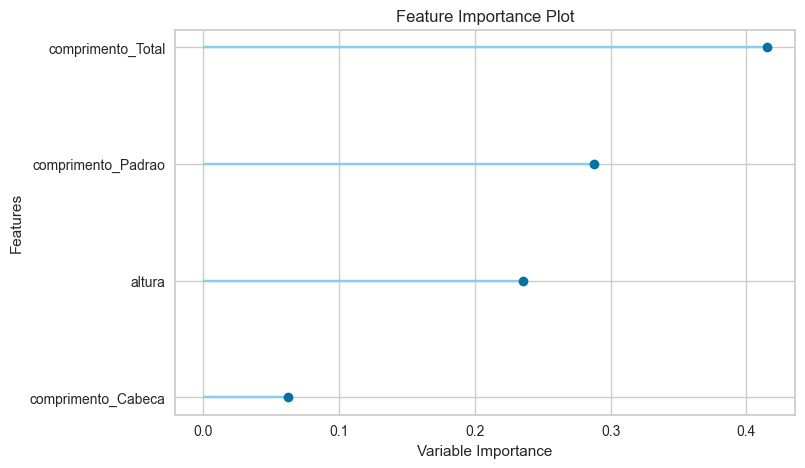

Processing DataFrame 3...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,4.0678,26.8551,5.0297,0.7275,0.0612,0.0509,0.0150
lasso,Lasso Regression,4.1112,29.0781,5.1998,0.7154,0.0638,0.0518,0.0140
llar,Lasso Least Angle Regression,4.1112,29.0782,5.1998,0.7154,0.0638,0.0518,0.0150
ada,AdaBoost Regressor,4.6290,34.7960,5.6288,0.6424,0.0685,0.0578,0.0500
rf,Random Forest Regressor,4.6673,35.3268,5.7893,0.6397,0.0701,0.0580,0.0790
lightgbm,Light Gradient Boosting Machine,5.1572,37.0510,6.0317,0.6093,0.0750,0.0655,0.0430
et,Extra Trees Regressor,5.0615,40.2026,6.2402,0.5835,0.0752,0.0627,0.0670
knn,K Neighbors Regressor,4.7084,40.1991,6.0285,0.5603,0.0730,0.0591,0.0170
gbr,Gradient Boosting Regressor,5.1458,42.1666,6.3603,0.5594,0.0784,0.0646,0.0510
lar,Least Angle Regression,4.2755,40.4686,5.4632,0.5299,0.0653,0.0542,0.0150


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.0994,29.4101,5.4231,0.7407,0.0659,0.0511
1,6.1929,54.1093,7.3559,0.3092,0.1004,0.0875
2,3.4688,17.0302,4.1268,0.4907,0.0507,0.0432
3,2.0711,6.6692,2.5825,0.8664,0.0321,0.0268
4,4.5552,35.7128,5.9760,0.6704,0.0666,0.0510
5,3.7881,21.7025,4.6586,0.8770,0.0527,0.0437
6,4.5755,32.9983,5.7444,0.8443,0.0689,0.0576
7,4.1391,30.0742,5.4840,0.8154,0.0658,0.0510
8,3.2146,14.6621,3.8291,0.8040,0.0460,0.0393


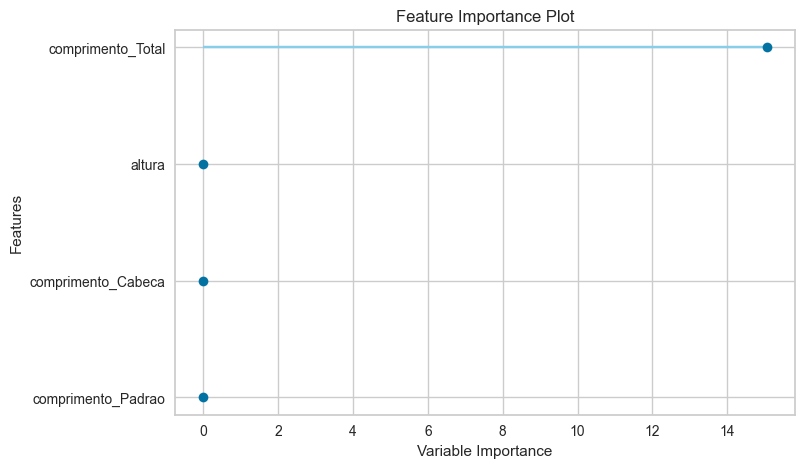

Processing DataFrame 4...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,6.5649,65.8844,7.9979,0.7892,0.0613,0.0513,0.0630
lr,Linear Regression,6.1459,66.3749,7.7322,0.7852,0.0602,0.0482,0.0180
lar,Least Angle Regression,6.1459,66.3748,7.7322,0.7852,0.0602,0.0482,0.0140
huber,Huber Regressor,6.2546,70.7878,7.9080,0.7735,0.0613,0.0488,0.0170
et,Extra Trees Regressor,6.8657,70.1815,8.2805,0.7677,0.0637,0.0536,0.0700
lightgbm,Light Gradient Boosting Machine,7.3579,79.0912,8.6910,0.7641,0.0676,0.0582,0.0590
rf,Random Forest Regressor,6.7535,74.3471,8.5205,0.7550,0.0653,0.0527,0.0850
br,Bayesian Ridge,6.2948,77.4853,8.0644,0.7541,0.0630,0.0491,0.0130
gbr,Gradient Boosting Regressor,7.2134,77.3346,8.7091,0.7353,0.0672,0.0563,0.0480
omp,Orthogonal Matching Pursuit,7.2932,78.1808,8.7556,0.7339,0.0682,0.0577,0.0140


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.7000,25.5554,5.0552,0.8601,0.0405,0.0302
1,9.7346,101.1065,10.0552,0.8532,0.0786,0.0774
2,6.5731,63.7469,7.9842,0.8784,0.0590,0.0505
3,5.1393,44.8671,6.6983,0.6444,0.0476,0.0359
4,5.9281,49.3448,7.0246,0.7420,0.0563,0.0484
5,7.1472,88.2585,9.3946,0.7568,0.0757,0.0584
6,7.4976,74.2915,8.6192,0.6521,0.0609,0.0561
7,7.4841,77.7649,8.8184,0.7825,0.0644,0.0563
8,6.1420,58.1481,7.6255,0.8847,0.0641,0.0498


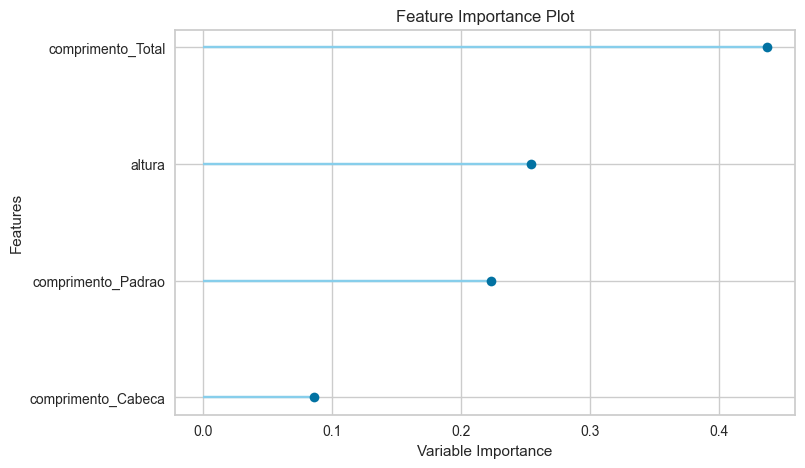

Processing DataFrame 5...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,11.7270,229.0348,14.5704,0.7063,0.0624,0.0508,0.0160
llar,Lasso Least Angle Regression,11.7267,229.0328,14.5703,0.7063,0.0624,0.0508,0.0160
ridge,Ridge Regression,11.8241,233.5947,14.7002,0.6938,0.0628,0.0511,0.0170
br,Bayesian Ridge,11.8422,234.0192,14.7132,0.6935,0.0629,0.0512,0.0170
huber,Huber Regressor,12.1812,240.8635,14.9598,0.6915,0.0641,0.0526,0.0210
lr,Linear Regression,11.8863,236.7269,14.7938,0.6893,0.0633,0.0514,0.0160
lar,Least Angle Regression,11.8863,236.7271,14.7938,0.6893,0.0633,0.0514,0.0190
en,Elastic Net,13.8681,292.7414,16.6451,0.6820,0.0725,0.0606,0.0170
rf,Random Forest Regressor,14.4326,311.6029,17.1104,0.6286,0.0741,0.0625,0.0900
et,Extra Trees Regressor,13.8425,307.8114,17.0034,0.6281,0.0729,0.0598,0.0790


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13.9275,308.2495,17.5570,0.7604,0.0645,0.0535
1,15.4939,367.8629,19.1798,0.7895,0.0843,0.0697
2,12.4170,284.9346,16.8800,0.8722,0.0802,0.0583
3,12.7482,233.6294,15.2849,0.8025,0.0595,0.0488
4,9.9781,197.1049,14.0394,0.5224,0.0639,0.0477
5,7.1758,81.5783,9.0321,0.8241,0.0400,0.0329
6,15.5905,382.8495,19.5665,-0.1615,0.0812,0.0646
7,15.2953,280.2170,16.7397,0.8110,0.0725,0.0669
8,8.2795,94.8827,9.7408,0.8995,0.0430,0.0363


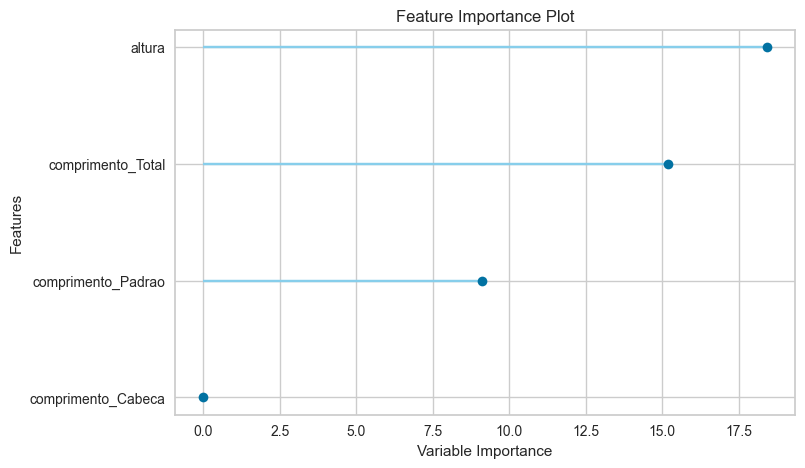

Processing DataFrame 6...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,18.9726,740.5801,25.3091,0.6538,0.0815,0.0632,0.0120
llar,Lasso Least Angle Regression,18.9718,740.5606,25.3105,0.6538,0.0815,0.0632,0.0160
huber,Huber Regressor,18.4866,740.3467,24.6863,0.6512,0.0784,0.0609,0.0180
ridge,Ridge Regression,18.9748,745.6666,25.4591,0.6507,0.0814,0.0626,0.0130
br,Bayesian Ridge,19.1106,750.2447,25.5564,0.6484,0.0817,0.0630,0.0200
lr,Linear Regression,19.1553,765.7866,25.7918,0.6428,0.0825,0.0634,0.0190
en,Elastic Net,21.3937,822.9184,27.5801,0.6080,0.0932,0.0736,0.0140
ada,AdaBoost Regressor,20.1515,761.1235,26.1478,0.6021,0.0921,0.0716,0.0440
rf,Random Forest Regressor,20.1387,823.7846,27.4726,0.5988,0.0953,0.0711,0.0840
et,Extra Trees Regressor,20.1123,777.6224,26.7179,0.5908,0.0914,0.0697,0.0700


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,34.0232,2492.2456,49.9224,0.1658,0.1654,0.1218
1,21.2984,721.5535,26.8617,0.7718,0.0733,0.0595
2,25.2300,1388.1248,37.2575,0.3011,0.1189,0.0830
3,17.0912,374.3312,19.3476,0.4645,0.0602,0.0526
4,14.4111,414.5432,20.3603,0.8104,0.0626,0.0477
5,18.3309,440.6719,20.9922,0.7162,0.0682,0.0589
6,12.1907,235.3608,15.3415,0.9078,0.0451,0.0356
7,17.6942,584.4207,24.1748,0.7488,0.0703,0.0559
8,14.3811,397.3597,19.9339,0.7379,0.0661,0.0490


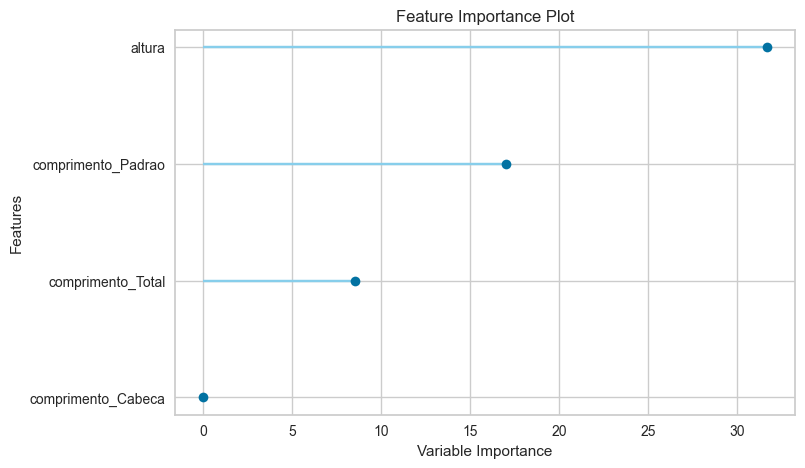

Processing DataFrame 7...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,26.0478,1521.6200,36.3491,0.5692,0.1066,0.0779,0.0160
llar,Lasso Least Angle Regression,26.0490,1521.6130,36.3485,0.5692,0.1066,0.0779,0.0170
br,Bayesian Ridge,25.8624,1522.8683,36.4202,0.5683,0.1065,0.0771,0.0160
ridge,Ridge Regression,26.2287,1526.4051,36.4599,0.5632,0.1067,0.0783,0.0150
huber,Huber Regressor,26.6593,1496.0596,35.9388,0.5627,0.1072,0.0809,0.0190
lr,Linear Regression,27.0016,1548.9370,36.8308,0.5485,0.1075,0.0802,0.0180
lar,Least Angle Regression,27.0016,1548.9363,36.8308,0.5485,0.1075,0.0802,0.0190
en,Elastic Net,28.4772,1613.1510,38.1134,0.5448,0.1121,0.0853,0.0160
omp,Orthogonal Matching Pursuit,31.4415,1831.6481,41.0859,0.4585,0.1185,0.0909,0.0160
et,Extra Trees Regressor,32.2733,2151.4830,44.2884,0.4504,0.1417,0.1030,0.0730


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,23.1488,729.4157,27.0077,0.7664,0.0754,0.0650
1,20.5959,719.6241,26.8258,0.8559,0.0597,0.0462
2,17.6683,408.1241,20.2021,0.9648,0.0538,0.0481
3,19.4814,914.1547,30.2350,0.7325,0.0878,0.0570
4,18.8224,556.7130,23.5948,0.7103,0.0587,0.0455
5,38.8505,3688.4253,60.7324,0.3580,0.1951,0.1459
6,22.0127,772.1224,27.7871,0.1554,0.0788,0.0676
7,35.0283,2973.6099,54.5308,0.1413,0.1807,0.1292
8,31.2817,1376.3206,37.0988,0.5028,0.0948,0.0769


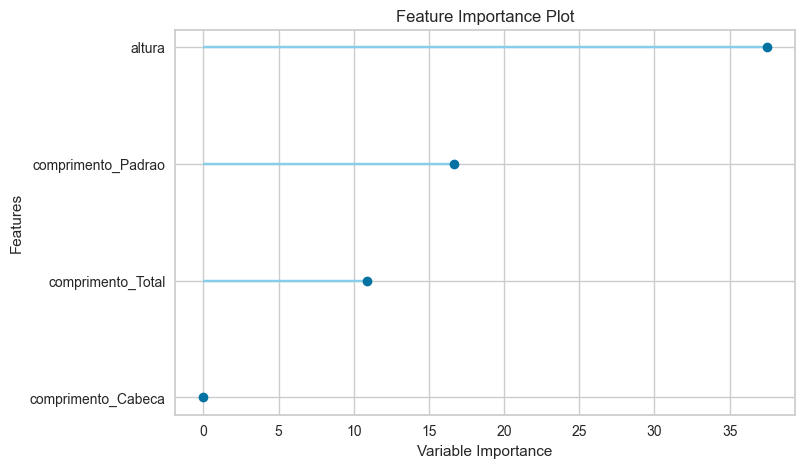

In [7]:
def automate_modeling(dataframes, target, models_dict):
    results = {}
    for i, df in enumerate(dataframes):
        print(f"Processing DataFrame {i+1}...")
        exp = setup(data=df, target=target, verbose=False)
        best_model = compare_models(n_select=1)
        bm_abbreviation = [abbr for name, abbr in models_dict.items() if best_model.__class__.__name__ in name]
        
        if bm_abbreviation:
            bm = create_model(bm_abbreviation[0])
            plot_model(bm, plot='feature')
            results[f'df{i+1}'] = bm
        else:
            print(f"No matching abbreviation found for the best model: {best_model.__class__.__name__}")

    return results

# Example usage
dataframes = dropped_dataframes
target_column = 'peso'
models_dict = {
    'LinearRegression': 'lr',
    'LassoRegression': 'lasso',
    'RidgeRegression': 'ridge',
    'ElasticNet': 'en',
    'LeastAngleRegression': 'lar',
    'LassoLeastAngleRegression': 'llar',
    'OrthogonalMatchingPursuit': 'omp',
    'BayesianRidge': 'br',
    'AutomaticRelevanceDetermination': 'ard',
    'PassiveAggressiveRegressor': 'par',
    'RandomSampleConsensus': 'ransac',
    'TheilSenRegressor': 'tr',
    'HuberRegressor': 'huber',
    'KernelRidge': 'kr',
    'SupportVectorMachine': 'svm',
    'KNeighborsRegressor': 'knn',
    'DecisionTree': 'dt',
    'RandomForest': 'rf',
    'ExtraTreesRegressor': 'et',
    'AdaBoostRegressor': 'ada',
    'GradientBoosting': 'gbr',
    'MultiLevelPerceptron': 'mlp',
    'ExtremeGradientBoosting': 'xgboost',
    'LightGradientBoosting': 'lightgbm',
    'CatBoostRegressor': 'catboost'
}

# Call the function
results = automate_modeling(dataframes, target_column, models_dict)